In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.style
import matplotlib as mpl
mpl.style.use('ggplot')

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10

from utils.network import GetArchivedFile
g=GetArchivedFile(shortcut="KGH")
df=g.get_data_frame()

df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d')
df['Date'] = pd.to_datetime(df['Date']).astype(int)/ 10**9

<http.client.HTTPResponse object at 0x7f973ab71a58> <class 'http.client.HTTPResponse'>


In [2]:
X = df.iloc[:, :-5].values
y = df.iloc[:, 4].values

from sklearn.preprocessing import StandardScaler
sc_X_prev, sc_y_prev = StandardScaler(), StandardScaler()
sc_X_next, sc_y_next = StandardScaler(), StandardScaler()

sc_X, sc_y = StandardScaler(), StandardScaler()
X, y = sc_X.fit_transform(X), sc_y.fit_transform(y.reshape(-1, 1))
X_prev = X[5000:5500]
y_prev = y[5000:5500]
X_next = X[5500:]
y_next = y[5500:]

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_prev, y_prev)

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_poly_prev = poly_reg.fit_transform(X_prev)
X_poly_next = poly_reg.fit_transform(X_next)

lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly_prev, y_prev)
y_next.size, len(y_next)

(124, 124)

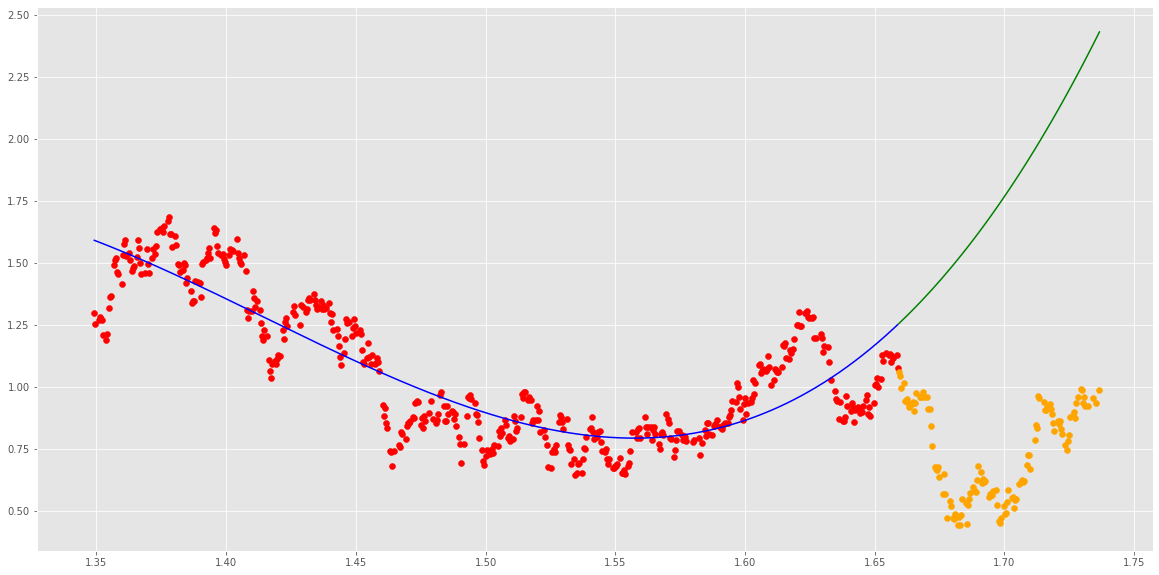

In [3]:
plt.scatter(X_prev, y_prev, color="red")
plt.scatter(X_next, y_next, color="orange")
plt.plot(X_prev, lin_reg_2.predict(X_poly_prev), color="blue")
plt.plot(X_next, lin_reg_2.predict(X_poly_next), color="green")